In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('Reviews.csv')

In [3]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [4]:
df.shape

(568454, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [6]:
df.Summary.head()

0    Good Quality Dog Food
1        Not as Advertised
2    "Delight" says it all
3           Cough Medicine
4              Great taffy
Name: Summary, dtype: object

In [7]:
df.Text.head()

0    I have bought several of the Vitality canned d...
1    Product arrived labeled as Jumbo Salted Peanut...
2    This is a confection that has been around a fe...
3    If you are looking for the secret ingredient i...
4    Great taffy at a great price.  There was a wid...
Name: Text, dtype: object

Text Preprocessing

In [8]:
from nltk.corpus import stopwords
from textblob import TextBlob
from textblob import Word

In [9]:
df['Text']=df['Text'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [10]:
df['Text'] = df['Text'].str.replace(r'[^\w\s]', '', regex=True)

df.Text.head(5)

0    i have bought several of the vitality canned d...
1    product arrived labeled as jumbo salted peanut...
2    this is a confection that has been around a fe...
3    if you are looking for the secret ingredient i...
4    great taffy at a great price there was a wide ...
Name: Text, dtype: object

In [11]:
string = "yoo the food is delicious"

In [12]:
print(string.replace("delicious","Yummy"))

yoo the food is Yummy


REMOVAL OF STOP WORDS

In [13]:

import nltk
nltk.download('stopwords')
stop = stopwords.words('english')
df['Text'] = df['Text'].apply(lambda x: " ".join(x for x in
x.split() if x not in stop))
df.Text.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Iqra\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0    bought several vitality canned dog food produc...
1    product arrived labeled jumbo salted peanutsth...
2    confection around centuries light pillowy citr...
3    looking secret ingredient robitussin believe f...
4    great taffy great price wide assortment yummy ...
Name: Text, dtype: object

SPELLING CORRECTION

LEMMATIZATION

In [14]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')   
from textblob import Word


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Iqra\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Iqra\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [15]:
df['Text']= df['Text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df.Text.head()

0    bought several vitality canned dog food produc...
1    product arrived labeled jumbo salted peanutsth...
2    confection around century light pillowy citrus...
3    looking secret ingredient robitussin believe f...
4    great taffy great price wide assortment yummy ...
Name: Text, dtype: object

In [16]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

In [17]:
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [18]:
df.Score.value_counts()

Score
5    363122
4     80655
1     52268
3     42640
2     29769
Name: count, dtype: int64

In [19]:
import seaborn as sns

<Axes: xlabel='Score', ylabel='count'>

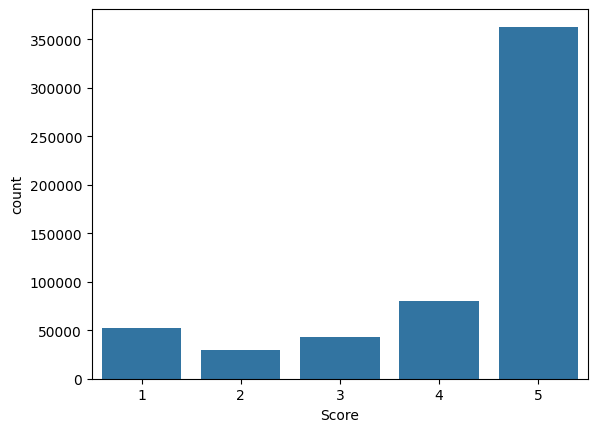

In [20]:
sns.countplot(data = df, x='Score')

In [21]:
reviews= df
reviews.dropna(inplace = True)

In [22]:
score_1 = reviews[reviews['Score']==1]
score_2 = reviews[reviews['Score']==2]
score_3 = reviews[reviews['Score']==3]
score_4 = reviews[reviews['Score']==4]
score_5 = reviews[reviews['Score']==5]

In [23]:
reviews_sample = pd.concat([score_1, score_2,score_3,score_4,score_5], axis=0)

In [24]:
reviews_sample.reset_index(drop=True,inplace=True)

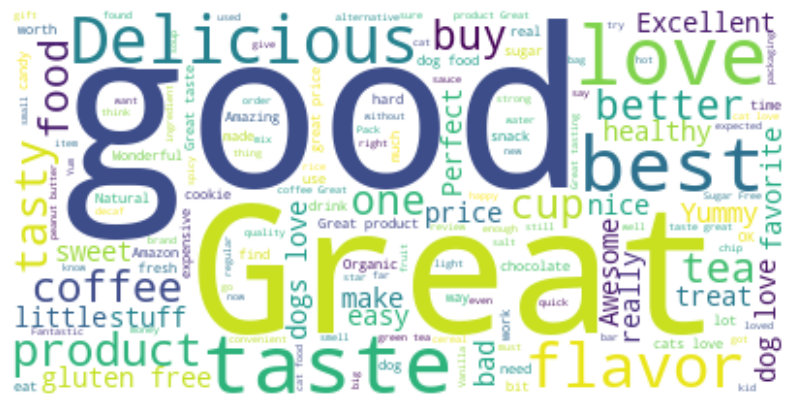

In [25]:
reviews_str = reviews_sample.Summary.str.cat()
wordcloud = WordCloud(background_color='white').generate(reviews_str)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

In [26]:
#  let's split the data into Negative (Score is 1 or 2) and Positive (4 or 5) Reviews.
negative_reviews = reviews_sample[reviews_sample['Score'].isin([1,2]) ]
positive_reviews = reviews_sample[reviews_sample['Score'].isin([4,5]) ]
# Transform to single string
negative_reviews_str = negative_reviews.Summary.str.cat()
positive_reviews_str = positive_reviews.Summary.str.cat()

Text(0.5, 1.0, 'Reviews with Negative Scores')

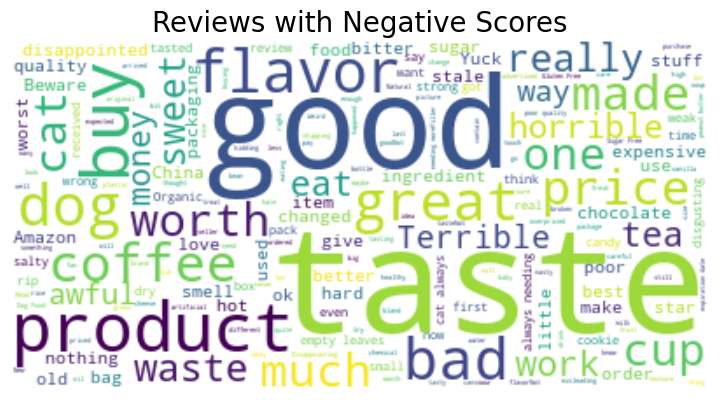

In [27]:
wordcloud_negative = WordCloud(background_color='white').generate(negative_reviews_str)
wordcloud_positive = WordCloud(background_color='black').generate(positive_reviews_str)
# Plot
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(211)
ax1.imshow(wordcloud_negative,interpolation='bilinear')
ax1.axis("off")
ax1.set_title('Reviews with Negative Scores',fontsize=20)

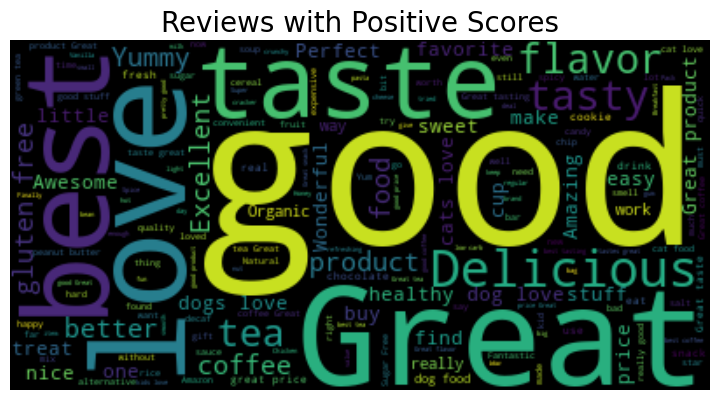

In [28]:
fig = plt.figure(figsize=(10,10))
ax2 = fig.add_subplot(212)
ax2.imshow(wordcloud_positive,interpolation='bilinear')
ax2.axis("off")
ax2.set_title('Reviews with Positive Scores',fontsize=20)
plt.show()

SENTIMENT SCORE

In [29]:
import re
import os
import sys
import ast
plt.style.use('fivethirtyeight')
# Function for getting the sentiment
cp = sns.color_palette()
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [30]:
# Generating sentiment for all the sentence present in the dataset
emptyline=[]
for row in df['Text']:
    
    vs=analyzer.polarity_scores(row)
    emptyline.append(vs)
# Creating new dataframe with sentiments
df_sentiments=pd.DataFrame(emptyline)
df_sentiments.head()

,neg,neu,pos,compound
0,0.000,0.503,0.497,0.9413
1,0.129,0.762,0.110,-0.1027
2,0.130,0.587,0.283,0.8532
3,0.000,0.854,0.146,0.4404
4,0.000,0.369,0.631,0.9468


In [31]:

# Merging the sentiments back to reviews dataframe
df_c = pd.concat([df.reset_index(drop=True), df_sentiments], axis=1)
df_c.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,neg,neu,pos,compound
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,bought several vitality canned dog food produc...,0.000,0.503,0.497,0.9413
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,product arrived labeled jumbo salted peanutsth...,0.129,0.762,0.110,-0.1027
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",confection around century light pillowy citrus...,0.130,0.587,0.283,0.8532


In [32]:
df_c['Sentiment'] = np.where(df_c['compound'] >= 0 , 'Positive','Negative')
df_c.head(5)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,neg,neu,pos,compound,Sentiment
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,bought several vitality canned dog food produc...,0.000,0.503,0.497,0.9413,Positive
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,product arrived labeled jumbo salted peanutsth...,0.129,0.762,0.110,-0.1027,Negative
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",confection around century light pillowy citrus...,0.130,0.587,0.283,0.8532,Positive
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,looking secret ingredient robitussin believe f...,0.000,0.854,0.146,0.4404,Positive
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,great taffy great price wide assortment yummy ...,0.000,0.369,0.631,0.9468,Positive


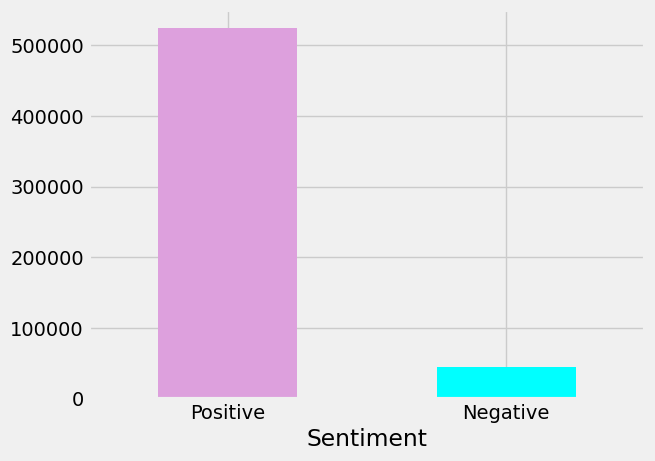

In [33]:
result=df_c['Sentiment'].value_counts()
result.plot(kind='bar', rot=0, color=['plum','cyan']);

In [37]:

import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC





In [38]:
def split_data(
    df: pd.DataFrame,
    text_col: str = "Text",
    label_col: str = "Sentiment",
    test_size: float = 0.2,
    random_state: int = 42,
    stratify: bool = True,
):
    X = df[text_col]
    y = df[label_col]
    return train_test_split(
        X,
        y,
        test_size=test_size,
        random_state=random_state,
        stratify=y if stratify else None,
    )


In [39]:
def model_zoo(random_state: int = 42):
    return {
        "LogReg": Pipeline([
            ("tfidf", TfidfVectorizer(ngram_range=(1,2), min_df=2)),
            ("clf", LogisticRegression(max_iter=2000, random_state=random_state))
        ]),
        "LinearSVC": Pipeline([
            ("tfidf", TfidfVectorizer(ngram_range=(1,2), min_df=2)),
            ("clf", LinearSVC(random_state=random_state))
        ]),
    }


In [48]:
def train_models(
    X_train: pd.Series,
    y_train: pd.Series,
    use_grid_search: bool = False,
    cv: int = 3,
    n_jobs: int = -1,
    random_state: int = 42,
):
    models = model_zoo(random_state=random_state)
    fitted = {}

    if use_grid_search:
        grids = default_param_grids()

    for name, pipe in models.items():
        if use_grid_search and name in grids:
            gs = GridSearchCV(
                estimator=pipe,
                param_grid=grids[name],
                cv=cv,
                n_jobs=n_jobs,
                scoring="f1_macro",
                refit=True,
            )
            gs.fit(X_train, y_train)
            fitted[name] = gs.best_estimator_
            print(f"[{name}] best params: {gs.best_params_}")
        else:
            pipe.fit(X_train, y_train)
            fitted[name] = pipe

    return fitted


In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

#  Load dataset
df = pd.read_csv("Reviews.csv")

#  Use 'Score' column to create Sentiment (if Score exists)
# Assume Score: 1-2 Negative, 3,4,5 = Positive

df = df.dropna(subset=["Text", "Score"])
df["Sentiment"] = df["Score"].apply(lambda x: "negative" if x <= 2  else "positive")

print(df["Sentiment"].value_counts())

#  Define features and labels
X = df["Text"]
y = df["Sentiment"]

#  Train-Test Split (now stratify works fine)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

#  Define Models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Linear SVC": LinearSVC()
}

results = {}

#  Train & Evaluate
for name, model in models.items():
    pipeline = Pipeline([
        ("tfidf", TfidfVectorizer(stop_words="english")),
        ("clf", model)
    ])
    
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    
    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average="weighted", zero_division=0),
        "Recall": recall_score(y_test, y_pred, average="weighted", zero_division=0)
    }
    
    print(f"\n {name} Classification Report:\n")
    print(classification_report(y_test, y_pred, zero_division=0))

#  Summary
print("\n✅ Model Performance Summary:")
results_df = pd.DataFrame(results).T
display(results_df)



Sentiment
positive    486417
negative     82037
Name: count, dtype: int64

 Logistic Regression Classification Report:

              precision    recall  f1-score   support

    negative       0.81      0.60      0.69     24611
    positive       0.94      0.98      0.96    145926

    accuracy                           0.92    170537
   macro avg       0.87      0.79      0.82    170537
weighted avg       0.92      0.92      0.92    170537


 Linear SVC Classification Report:

              precision    recall  f1-score   support

    negative       0.80      0.66      0.73     24611
    positive       0.94      0.97      0.96    145926

    accuracy                           0.93    170537
   macro avg       0.87      0.82      0.84    170537
weighted avg       0.92      0.93      0.92    170537


✅ Model Performance Summary:


,Accuracy,Precision,Recall
Logistic Regression,0.921653,0.916917,0.921653
Linear SVC,0.927863,0.924252,0.927863
